# Visualization of categorical data

In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Importing and preparing dataset

In [2]:
data = pd.read_csv('../data/Customer_churn.csv')
print(f'Data shape: {data.shape}')
data.head()

Data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The last attribute - **Churn** is a target variable. It provides information if the customer left the company (**Yes**) or stayed with the company (**No**).

Use **binning technique** for reducing the cardinality of continuous and discrete data. As a result, the number of distinct values is reduced.

In [3]:
def tenure(data):
    # if the customer stays with the company <= 1 year return 'Short' label
    # otherwise return 'Long'
    if 0 < data  <= 24 :
        return 'Short'
    else:
        return 'Long'

def charges(data):
    # discretize monthly charges variable 
    if 0 < data  <= 70 :
        return 'LowCharge'
    else:
        return 'HighCharge'

data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['tenure'] = data['tenure'].apply(tenure)
data['MonthlyCharges'] = data['MonthlyCharges'].apply(charges)
data.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)

Take a look at the snippet of dataset after preprocessing.

In [4]:
print(f'Data shape: {data.shape}')
data.head()

Data shape: (7043, 19)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,Short,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,LowCharge,No
1,Male,No,No,No,Long,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,LowCharge,No
2,Male,No,No,No,Short,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,LowCharge,Yes
3,Male,No,No,No,Long,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),LowCharge,No
4,Female,No,No,No,Short,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,HighCharge,Yes


Check for the number of categorical and numerical features.

In [5]:
category_feat_num = len(data.select_dtypes(include=['object']).columns)
numeric_feat_num = len(data.select_dtypes(include=['int64', 'float64']).columns)

print(f'Number of categorical features : {category_feat_num}')
print(f'Number of continuous features : {numeric_feat_num}')

Number of categorical features : 19
Number of continuous features : 0


Check for the data levels in each categorical feature. 

In [6]:
data.nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
tenure              2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
MonthlyCharges      2
Churn               2
dtype: int64

Most of the data fields contain 2 or 3 levels each. Only *PaymentMethod* column is coded with 4 levels. 

## MCA
Multiple correspondence analysis (MCA) is an extension of correspondence analysis (CA). It should be used when you have more than two categorical variables. The idea is simply to compute the one-hot encoded version of a dataset and apply CA on it.

Correspondence analysis (CA) is an algorithm to analyze the dependecies between two categorical variables. 

Firstly, initialize the MCA object and fit the data.

In [7]:
mca = prince.MCA(
        n_components=2, # select 2 components for visualization purposes
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42)
mca = mca.fit(data)

Each principal component explains part of the underlying of the distribution. You can see by how much by using the accessing the ```explained_inertia_``` property.

In [8]:
print(f'First 2 components explained inertia: {mca.explained_inertia_}')

First 2 components explained inertia: [0.2662218637827082, 0.11762581040809797]


Display MCA plot coordinates. 

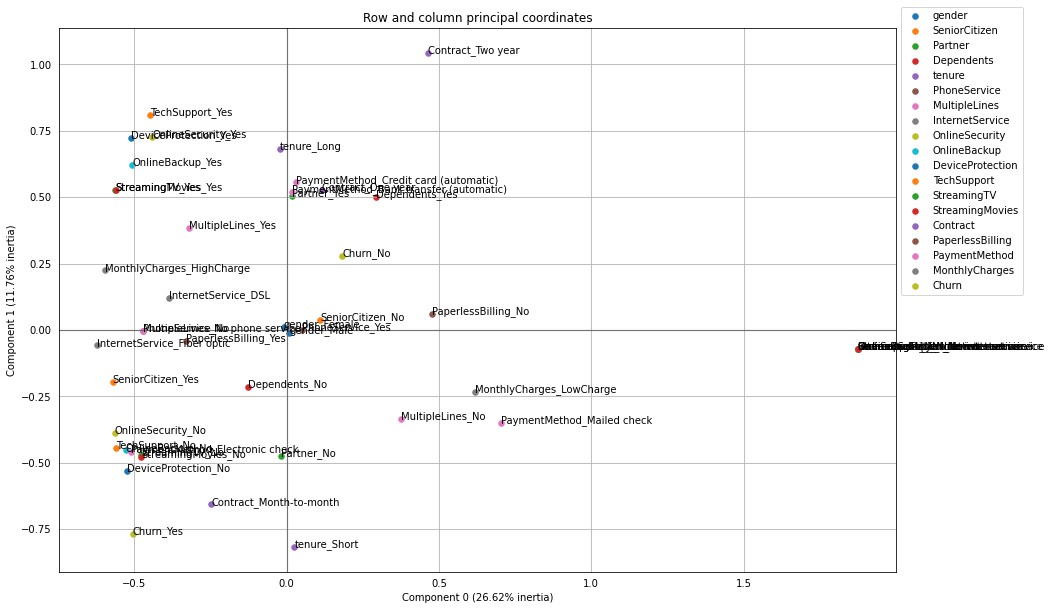

In [9]:
ax = mca.plot_coordinates(
        X=data,
        ax=None,
        figsize=(15, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1).legend(loc='lower left', bbox_to_anchor=(1, 0.5))

### Plot interpretation
One of the approach of interpreting above plot is to checking how close input categorical features are to the target variable **Churn** and to each other.

Customers without device protection, single customers, those with month to month contractual agreements or customers with no dependents are being related to a **short tenure** with the company and a high risk to **churn**.

However, customers with more than a year contract, those with automatic payment method, customers with multiple lines are being related to a **long tenure** with the company and a higher tendency to **stay** with company.


### Classification using MCA and KNN 
Separate target variable **Churn** from the dataset. Split data into train and test sets. Fit and transform train data using MCA. On the test data make only transformation. 

In [10]:
y = data['Churn']
X = data.drop('Churn', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mca = mca.fit(X_train)
X_train_mca = mca.transform(X_train)
X_test_mca = mca.transform(X_test)
print(f'Shape of transformed test data: {X_test_mca.shape}')
X_test_mca.head()

Shape of transformed test data: (2113, 2)


,0,1
185,-0.406088,-0.706941
2715,1.074329,0.009512
3825,1.347279,0.245244
1807,-0.342193,-0.532216
132,-0.129044,-0.131482


Use principal components and KNN to classify data.

In [11]:
def KNN_classification(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf = clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print(f'KNN mean accuracy score on the train set: {train_score:.2f}, test set: {test_score:.2f}')

KNN_classification(X_train_mca, X_test_mca, y_train, y_test)

KNN mean accuracy score on the train set: 0.85, test set: 0.76


## Measure MCA time complexity
Measure time of MCA algorithm fitting on truncated data.

In [12]:
data_sizes = np.arange(100, data.shape[0], step=1000)

time_measure = []
for size in data_sizes:
    start = time.time()
    mca.fit(data.iloc[:size, :])
    stop = time.time()
    time_measure.append((stop-start))

df_time = pd.DataFrame({'size': data_sizes, 'time': time_measure})
df_time.to_csv('../results/MCA_time_perform.csv', index=False)

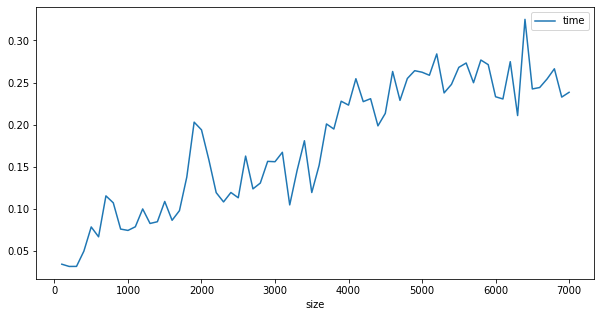

In [13]:
df_time.plot('size', 'time', figsize=(10,5))
plt.show()

For N in range ```[100, 7000]``` with step=100, the complexity of MCA algorithm grows in proportion to the size. 

## PCA with one-hot encoding
PCA is designed for continuous variables, although we will try to use it on binary data (one-hot encoded data) and compare KNN classification results with MCA method.

Firstly, let's make binary variables from categorical ones. 

In [14]:
X_ohe = pd.get_dummies(X)
print(f'Shape of input data after one-hot encoding: {X_ohe.shape}')
X_ohe.head()

Shape of input data after one-hot encoding: (7043, 47)


,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_Long,tenure_Short,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_HighCharge,MonthlyCharges_LowCharge
0,1,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,1
2,0,1,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,1,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


Split data into train and test set.

In [15]:
X_train_ohe, X_test_ohe = train_test_split(X_ohe, test_size=0.3, random_state=42)

In [16]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_ohe)
X_test_pca = pca.transform(X_test_ohe)
print(f'First 2 components explained variance ratio: {pca.explained_variance_ratio_}')


First 2 components explained variance ratio: [0.2318943 0.1424278]


Classification using PCA and KNN.

In [17]:
KNN_classification(X_train_pca, X_test_pca, y_train, y_test)

KNN mean accuracy score on the train set: 0.84, test set: 0.75


Generate a **loading plot** to identify which variables have the largest effect on each component. Moreover, check the dependencies between variables.

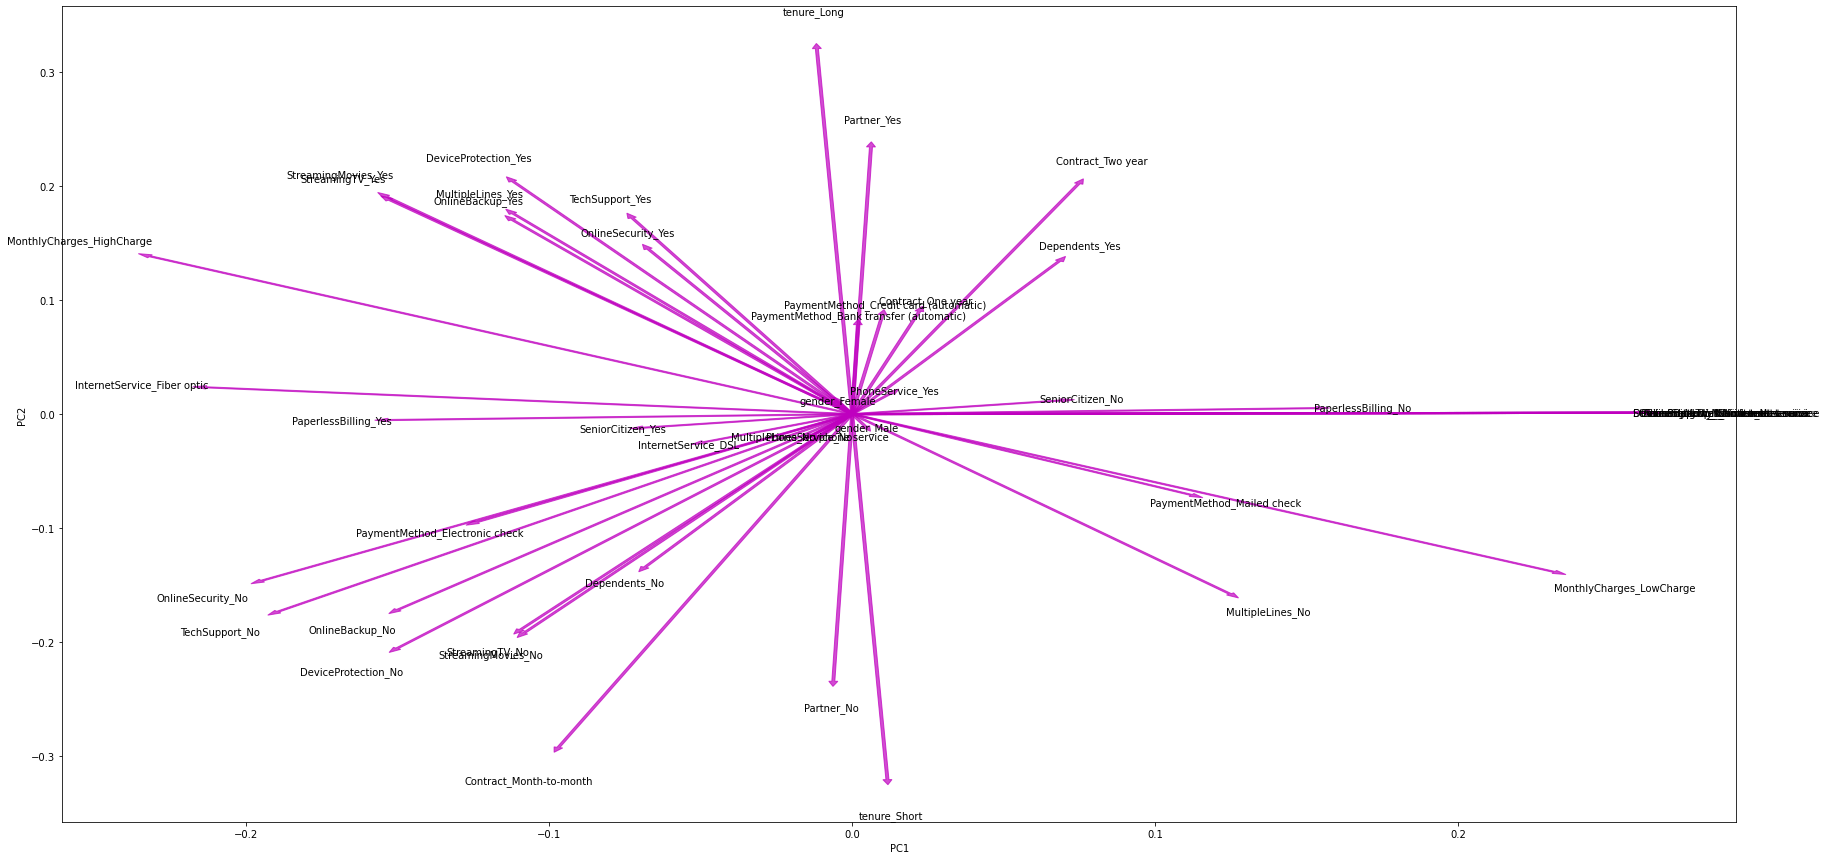

In [18]:
def generate_loading_plot(score, coeff, col_names):
    no_features = coeff.shape[1]

    plt.figure(figsize=(30, 15))

    for i in range(no_features):
        plt.arrow(0, 0, coeff[0, i], coeff[1, i], color='m', alpha=0.7)
        plt.text(1.1 * coeff[0, i], 1.1 * coeff[1, i], s=col_names[i], ha='center', va='center')

    plt.xlabel('PC1')
    plt.ylabel('PC2')

generate_loading_plot(X_train_pca, pca.components_, X_train_ohe.columns)

Conclusions:

- a small angle between vectors (eg. (Contract_Month-to-month, Partner_No, tenure Short), (Partner_Yes, PaymentMethod_Credit_Card(automatic), tenure_Long)) implies positive correlation between features
- a large angle (> 90 degree) between vectors (eg. (TechSupport_No, tenure_Long)) implies negative correlation between features
- a straight angle between vectors will implies no correlation between features (eg. (SeniorCitizen_Yes, PaperlessBilling_No))
- the further away the vector from a PC origin is, the more influence it has on that PC (eg. MonthlyCharges_HighCharge  for PC1)